# Heart disease prediction model

## 1) Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams #Each time Matplotlib loads, it defines a runtime configuration (rc) containing the default styles for every plot element you create. This configuration can be adjusted at any time using the plt.
from matplotlib.cm import rainbow
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## 2) Loading in the dataset and gaining basic insights

In [3]:
df = pd.read_csv("heart.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.shape

(4238, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
male               4238 non-null int64
age                4238 non-null int64
education          4133 non-null float64
currentSmoker      4238 non-null int64
cigsPerDay         4209 non-null float64
BPMeds             4185 non-null float64
prevalentStroke    4238 non-null int64
prevalentHyp       4238 non-null int64
diabetes           4238 non-null int64
totChol            4188 non-null float64
sysBP              4238 non-null float64
diaBP              4238 non-null float64
BMI                4219 non-null float64
heartRate          4237 non-null float64
glucose            3850 non-null float64
TenYearCHD         4238 non-null int64
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [6]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [7]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
df.fillna(method="ffill", inplace=True)
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## 3) Visualizations

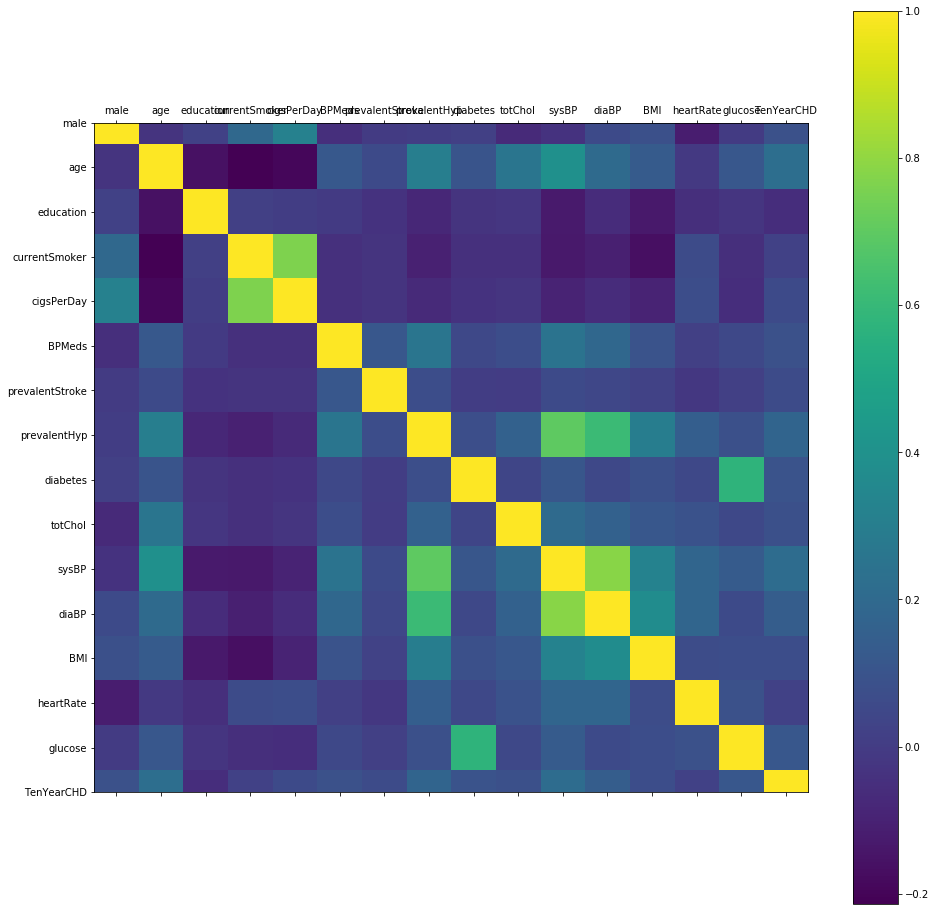

In [9]:
rcParams['figure.figsize'] = 20, 18
plt.matshow(df.corr())
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.xticks(np.arange(df.shape[1]), df.columns)
plt.colorbar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029C80923A88>,
      dtype=object)

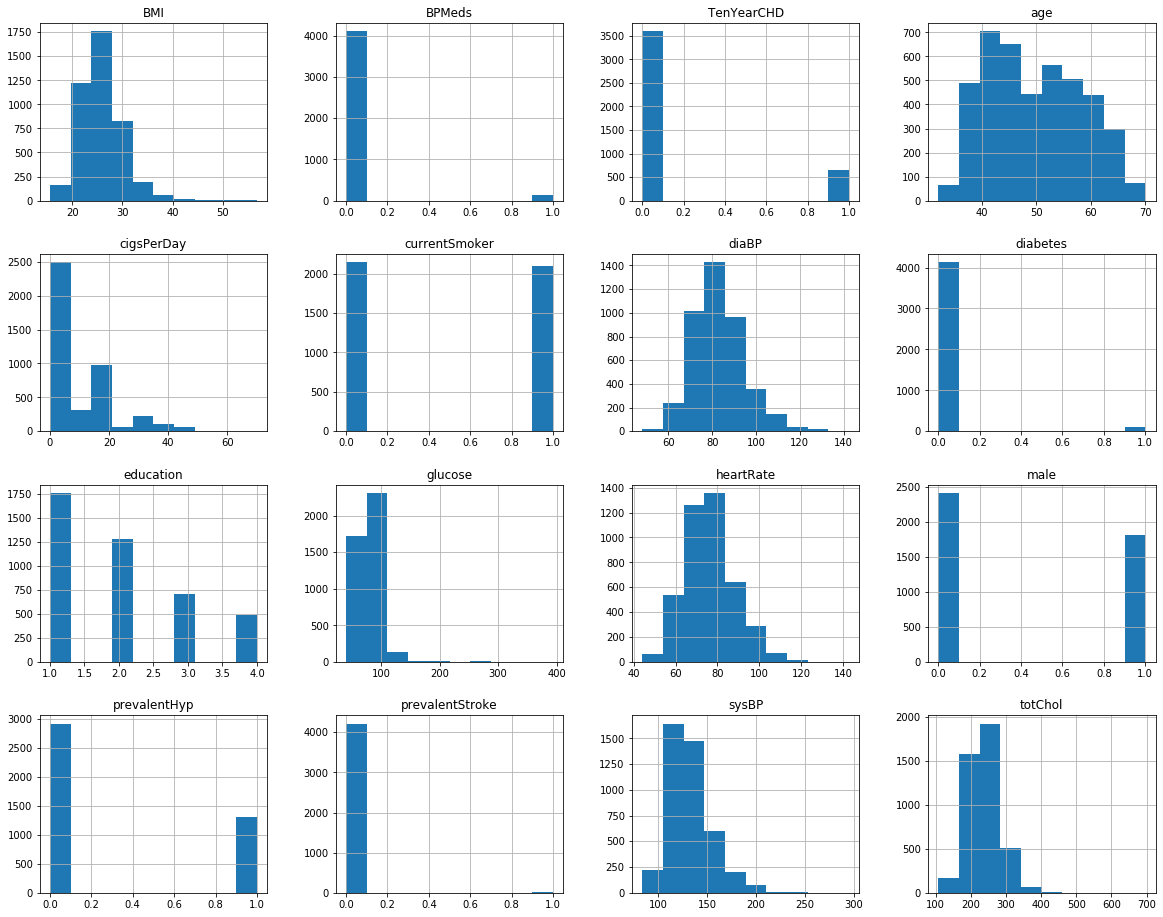

In [10]:
rcParams['figure.figsize'] = 20, 16
df.hist()

Text(0.5, 1.0, 'Count of each Target Class')

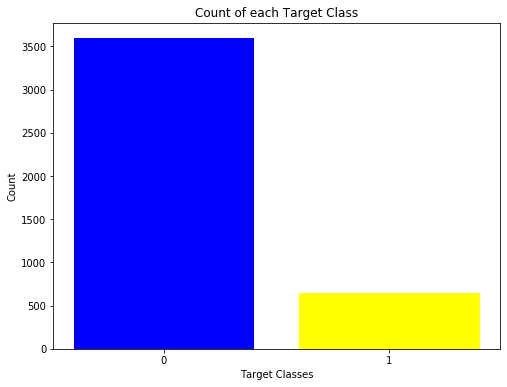

In [11]:
rcParams['figure.figsize'] = 8,6
plt.bar(df['TenYearCHD'].unique(), df['TenYearCHD'].value_counts(), color = ['blue', 'yellow'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

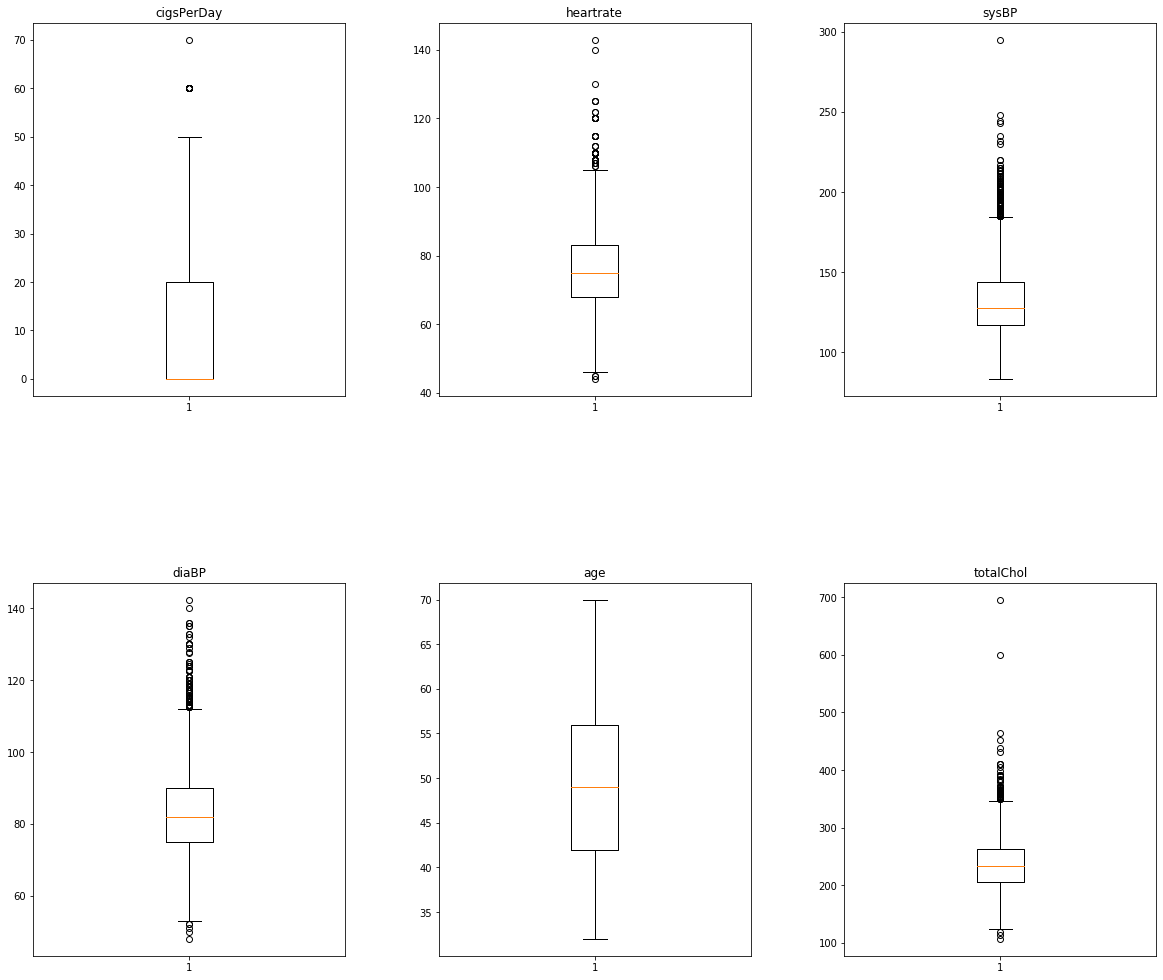

In [12]:
rcParams['figure.figsize'] = 20, 16
fig, axs = plt.subplots(2, 3)

axs[0, 0].boxplot(df["cigsPerDay"])
axs[0, 0].set_title('cigsPerDay')

axs[0, 1].boxplot(df["heartRate"])
axs[0, 1].set_title('heartrate')

axs[0, 2].boxplot(df["sysBP"])
axs[0, 2].set_title('sysBP')

axs[1, 0].boxplot(df["diaBP"])
axs[1, 0].set_title("diaBP")

axs[1, 1].boxplot(df["age"])
axs[1, 1].set_title('age')

axs[1, 2].boxplot(df["totChol"])
axs[1, 2].set_title('totalChol')

fig.subplots_adjust(left=0.2, right=0.98, bottom=0.09, top=0.9,hspace=0.5, wspace=0.3)


## 4) Removing outliers

In [13]:
df[df["cigsPerDay"]>50]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
327,1,56,1.0,1,60.0,0.0,0,0,0,246.0,125.0,79.0,29.64,70.0,85.0,0
721,1,59,1.0,1,60.0,0.0,0,1,0,298.0,153.5,105.0,25.05,70.0,84.0,0
1054,1,58,2.0,1,60.0,0.0,0,1,0,250.0,150.0,97.0,32.00,75.0,65.0,0
1452,1,39,1.0,1,60.0,0.0,0,0,0,215.0,112.0,65.0,23.60,59.0,78.0,0
1468,1,50,1.0,1,60.0,0.0,0,1,0,340.0,134.0,95.0,30.46,85.0,86.0,0
1488,1,37,4.0,1,60.0,0.0,0,0,0,254.0,122.5,82.5,23.87,88.0,83.0,0
1849,1,48,1.0,1,60.0,0.0,0,0,0,252.0,104.0,73.5,23.03,70.0,77.0,0
2709,1,46,1.0,1,60.0,0.0,0,0,0,285.0,121.0,82.0,27.62,70.0,79.0,0
2710,1,49,2.0,1,60.0,0.0,0,0,0,213.0,123.0,75.0,24.84,70.0,79.0,1
3008,1,40,3.0,1,70.0,0.0,0,1,0,210.0,132.0,86.0,31.57,98.0,80.0,0


In [14]:
df.drop([327,721,1054,1452,1468,1488,1849,2709,2710,3008,3673,3928], inplace = True)
df[df["cigsPerDay"]>50]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [15]:
df[(df["totChol"]>400) | (df["totChol"]<100)]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
194,0,42,3.0,0,0.0,0.0,0,0,0,464.0,128.0,87.0,22.90,72.0,72.0,1
543,1,47,2.0,1,18.0,0.0,0,1,0,439.0,145.0,74.0,22.42,100.0,90.0,1
1111,0,52,2.0,0,0.0,0.0,0,1,1,600.0,159.5,94.0,28.27,78.0,140.0,1
1544,1,42,1.0,1,20.0,0.0,0,0,0,410.0,116.0,83.0,21.68,90.0,83.0,0
1937,0,59,1.0,0,0.0,0.0,0,1,0,410.0,142.0,79.0,25.58,78.0,90.0,0
2206,1,46,1.0,1,15.0,0.0,0,1,0,405.0,181.5,102.5,26.33,98.0,97.0,1
2985,0,57,1.0,0,0.0,1.0,0,1,0,432.0,153.0,85.0,26.13,98.0,75.0,1
3160,1,51,2.0,1,9.0,0.0,0,1,0,696.0,157.0,87.0,24.44,95.0,84.0,0
3474,1,42,2.0,1,15.0,0.0,0,1,0,453.0,158.0,108.0,28.89,90.0,110.0,0
3806,0,52,2.0,1,20.0,0.0,0,0,0,410.0,105.0,67.5,27.33,75.0,90.0,0


In [16]:
df.drop([194,543,1111,1544,1937,2206,2985,3160,3474,3806], inplace = True)
df[(df["totChol"]>400) | (df["totChol"]<100)]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [17]:
df[(df["diaBP"]>130) | (df["diaBP"]<40)]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
446,1,61,1.0,0,0.0,0.0,0,1,0,182.0,209.0,133.0,30.77,65.0,75.0,0
481,0,64,1.0,0,0.0,0.0,0,1,0,253.0,295.0,135.0,38.82,92.0,70.0,1
833,0,53,1.0,0,0.0,0.0,0,1,1,248.0,200.0,140.0,43.30,107.0,130.0,1
1189,0,48,1.0,0,0.0,0.0,0,1,0,169.0,243.0,142.5,28.49,85.0,77.0,0
1751,0,47,2.0,0,0.0,0.0,0,1,0,215.0,202.0,132.0,20.49,100.0,77.0,0
1989,1,61,1.0,0,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0
2608,0,52,1.0,0,0.0,0.0,0,1,0,252.0,208.0,136.0,25.79,92.0,82.0,0
2683,0,65,1.0,0,0.0,0.0,0,1,0,295.0,210.0,135.0,24.73,72.0,93.0,1
4040,1,66,3.0,0,0.0,0.0,0,1,0,226.0,213.0,133.0,25.29,100.0,67.0,0


In [18]:
df.drop([446,481,833,1189,1751,1989,2608,2683,4040], inplace = True)
df[(df["diaBP"]>130) | (df["diaBP"]<40)]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [19]:
df[df["sysBP"]>225]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
864,0,59,2.0,0,0.0,1.0,0,1,0,264.0,244.0,124.0,19.61,76.0,120.0,1
2091,1,65,1.0,0,0.0,0.0,0,1,1,240.0,235.0,100.0,21.29,68.0,297.0,1
3489,0,62,2.0,0,0.0,1.0,0,1,0,298.0,248.0,130.0,37.10,96.0,77.0,1
3616,0,54,2.0,1,15.0,0.0,0,1,0,262.0,230.0,110.0,24.76,93.0,97.0,0


In [20]:
df.drop([864,2091,3489,3616], inplace = True)
df[df["sysBP"]>225]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


## 5) Defining dependent and independent variables

In [21]:
y = df['TenYearCHD']
X = df.drop(['TenYearCHD'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

## 6) Machine learning algorithms
#### A) K nearest neighbours

In [22]:
from sklearn.model_selection import GridSearchCV

#create a new knn object
knn = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
params_knn = {"n_neighbors": np.arange(1, 25)}

#use gridsearch to test all values for n_neighbors
knn_gs = GridSearchCV(knn, params_knn, cv=5)

#fit model to training data
knn_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [23]:
#save best model
knn_best = knn_gs.best_estimator_

#check best n_neigbors value
print(knn_gs.best_params_)

{'n_neighbors': 23}


In [24]:
knn_classifier = KNeighborsClassifier(n_neighbors = 23)
knn_classifier.fit(X_train, y_train)
knn_classifier.score(X_test, y_test)

0.8550829127613554

#### B) Decision trees

In [25]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

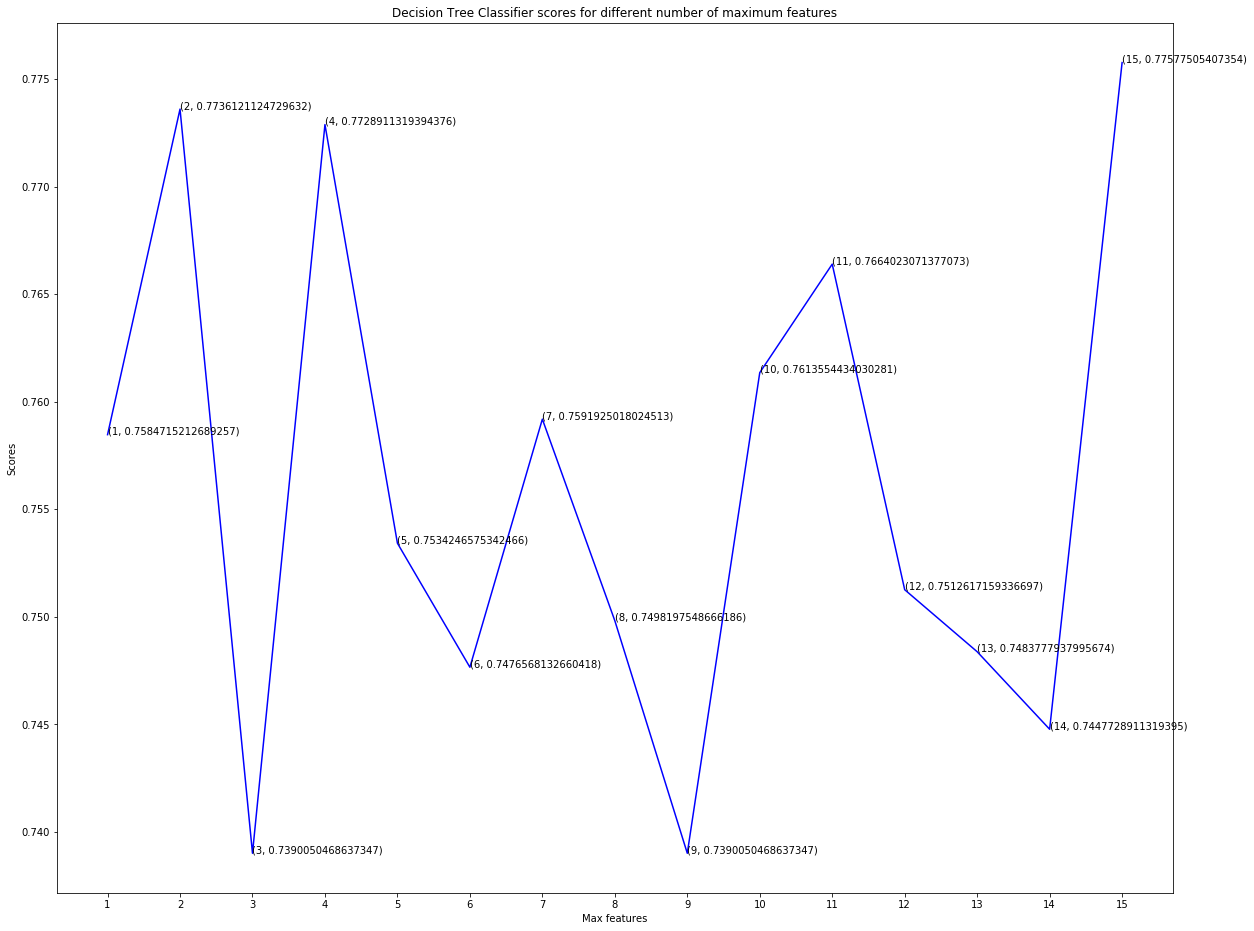

In [26]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'blue')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

#### C) Random forests

In [27]:
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

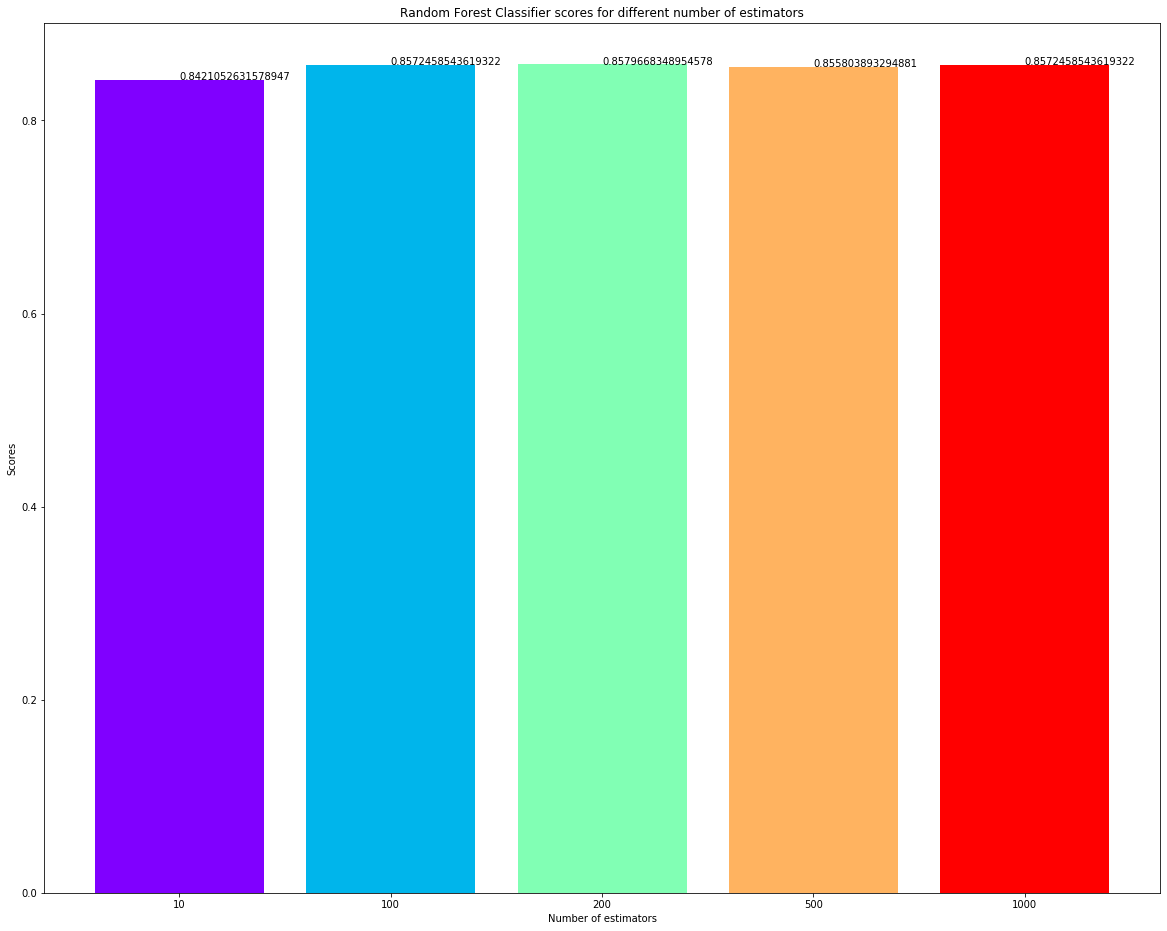

In [28]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

In [29]:
#create a new random forest classifier
rf = RandomForestClassifier()

#create a dictionary of all values we want to test for n_estimators
params_rf = {"n_estimators": [50, 100, 200]}

#use gridsearch to test all values for n_estimators
rf_gs = GridSearchCV(rf, params_rf, cv=5)

#fit model to training data
rf_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [30]:
#save best model
rf_best = rf_gs.best_estimator_

#check best n_estimators value
print(rf_gs.best_params_)

{'n_estimators': 200}


In [31]:
print(rf_scores[2])

0.8579668348954578


#### D) Logistic regression

In [32]:
#create a new logistic regression model
log_reg = LogisticRegression()

#fit the model to the training data
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
log_reg.score(X_test, y_test)

0.8572458543619322

## 7) Test the three models with the test data and print their accuracy scores

In [34]:
print("knn: {}".format(knn_best.score(X_test, y_test)))
print("rf: {}".format(rf_best.score(X_test, y_test)))
print("log_reg: {}".format(log_reg.score(X_test, y_test)))

knn: 0.8550829127613554
rf: 0.8572458543619322
log_reg: 0.8572458543619322


## 8) Implement ensemle learning techniques

In [35]:
from sklearn.ensemble import VotingClassifier

#create a dictionary of our models
estimators=[("knn", knn_best), ("rf", rf_best), ("log_reg", log_reg)]

#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting="hard")

In [36]:
#fit model to training data
ensemble.fit(X_train, y_train)

#test our model on the test data
ensemble.score(X_test, y_test)

0.8572458543619322